Base de dato de injuries

In [2]:
import pandas as pd
import re

def extract_injury_info(text):
    if not isinstance(text, str) or pd.isna(text):
        return pd.Series({
            'anatomical_area': 'not_specified',
            'injury_type': 'not_specified',
            'status': 'not_specified'
        })
    
    # Limpieza básica del texto
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)  # quita espacios duplicados
    text = re.sub(r'[(){}[\]]', '', text)  # quita paréntesis y corchetes

    # Correcciones de errores comunes
    typo_corrections = {
        "outindefinetily": "out indefinitely",
        "outindefinately": "out indefinitely",
        "out indefinately": "out indefinitely",
        "out indefinetly": "out indefinitely",
        "out indefinetely": "out indefinitely"
    }
    for typo, correction in typo_corrections.items():
        text = text.replace(typo, correction)

    # Anatomical areas
    anatomical_areas = {
        'knee': r'knee|patella|acl|mcl|pcl',
        'ankle': r'ankle',
        'shoulder': r'shoulder',
        'wrist': r'wrist',
        'back': r'back',
        'hamstring': r'hamstring',
        'achilles': r'achilles',
        'foot': r'foot',
        'hip': r'hip',
        'elbow': r'elbow',
        'hand': r'hand|finger|pinky|thumb',
        'neck': r'neck',
        'groin': r'groin',
        'quad': r'quad'
    }

    # Injury types
    injury_types = {
        'fracture': r'fracture|broken|stress fracture',
        'sprain': r'sprain',
        'dislocation': r'dislocat|luxation',
        'tear': r'tear|rupture|torn',
        'surgery': r'surgery|procedure',
        'strain': r'strain|pull',
        'contusion': r'contusion|bruise',
        'pain': r'pain|soreness|tightness'
    }

    # Anatomical area
    anatomical_area = 'not_specified'
    for area, pattern in anatomical_areas.items():
        if re.search(pattern, text):
            anatomical_area = area
            break

    # Injury type
    injury_type = 'other'
    for injury, pattern in injury_types.items():
        if re.search(pattern, text):
            injury_type = injury
            break

    # Injury status
    if "out indefinitely" in text:
        status = 'out_indefinitely'
    elif re.search(r'out for season|il|inactive', text):
        status = 'IL'
    elif re.search(r'returned to lineup|activated|available', text):
        status = 'returned'
    else:
        status = 'active'

    return pd.Series({
        'anatomical_area': anatomical_area,
        'injury_type': injury_type,
        'status': status
    })


# Load the dataset
lesiones = pd.read_csv(r'C:\Users\CamiUribe\OneDrive\Desktop\Lesiones 2010-2020 con ID.csv')

# Clean column names
lesiones.columns = lesiones.columns.str.strip()

# Print column names to verify
print("Columnas en el DataFrame:", lesiones.columns)

# Check the first few rows of the DataFrame
print(lesiones.head())

# Apply the function to the 'Notes' column
if 'Notes' in lesiones.columns:
    # Apply the function and create a DataFrame directly
    parsed_data = lesiones['Notes'].apply(extract_injury_info)
    
    # No need to convert to list, parsed_data is already a DataFrame
    lesiones = pd.concat([lesiones, parsed_data], axis=1)

    # Display the updated DataFrame
    print(lesiones[['Notes', 'anatomical_area', 'injury_type', 'status']].head())
else:
    print("La columna 'Notes' no se encuentra en el DataFrame.")


print(lesiones)





Columnas en el DataFrame: Index(['Date', 'Team', 'Nombre', 'Acquired', 'Relinquished', 'Notes', 'ID'], dtype='object')
       Date     Team         Nombre Acquired   Relinquished  \
0  03-10-10    Bulls  Carlos Boozer      NaN  Carlos Boozer   
1  06-10-10  Pistons  Jonas Jerebko      NaN  Jonas Jerebko   
2  06-10-10  Pistons  Terrico White      NaN  Terrico White   
3  08-10-10  Blazers     Jeff Ayres      NaN     Jeff Ayres   
4  08-10-10     Nets    Troy Murphy      NaN    Troy Murphy   

                                               Notes      ID  
0  fractured bone in right pinky finger (out inde...    2430  
1      torn right Achilles tendon (out indefinitely)  201973  
2  broken fifth metatarsal in right foot (out ind...  202358  
3          torn ACL in right knee (out indefinitely)  201965  
4             strained lower back (out indefinitely)    2211  
                                               Notes anatomical_area  \
0  fractured bone in right pinky finger (out inde...

Analiis EDA del archivo 

In [3]:
#tipos de datos en la tabla
lesiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27105 entries, 0 to 27104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             27105 non-null  object
 1   Team             27103 non-null  object
 2   Nombre           27101 non-null  object
 3   Acquired         9542 non-null   object
 4   Relinquished     17560 non-null  object
 5   Notes            27105 non-null  object
 6   ID               27105 non-null  object
 7   anatomical_area  27105 non-null  object
 8   injury_type      27105 non-null  object
 9   status           27105 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


In [4]:
# hallazgo de nulos
lesiones.isnull().sum()

Date                   0
Team                   2
Nombre                 4
Acquired           17563
Relinquished        9545
Notes                  0
ID                     0
anatomical_area        0
injury_type            0
status                 0
dtype: int64

In [5]:
duplicado = lesiones.duplicated()
print('Los duplicados son:', duplicado)

Los duplicados son: 0        False
1        False
2        False
3        False
4        False
         ...  
27100    False
27101    False
27102    False
27103    False
27104    False
Length: 27105, dtype: bool


In [6]:
# Analisis descriptivo
lesiones.describe()


,Date,Team,Nombre,Acquired,Relinquished,Notes,ID,anatomical_area,injury_type,status
count,27105,27103,27101,9542,17560,27105,27105,27105,27105,27105
unique,2103,32,1158,1111,1156,3114,1148,15,9,4
top,16-04-14,Spurs,Kevin Love,Dwyane Wade,Kevin Love,activated from IL,201567,not_specified,other,IL
freq,76,1163,139,54,101,7342,139,16970,20536,16804


In [7]:
# Analisis descptivo (graficas)
import seaborn as sns
import matplotlib.pyplot as plt

print(lesiones.head())

#calculo de frecuencias absolutas

columnas = ['Relinquished', 'Notes', 'ID', 'anatomical_area', 'injury_type', 'status']

for col in columnas:
    print(f"Frecuencia absoluta de '{col}':")
    print(lesiones[col].value_counts(dropna=False))
    print("\n" + "-"*50 + "\n")

       Date     Team         Nombre Acquired   Relinquished  \
0  03-10-10    Bulls  Carlos Boozer      NaN  Carlos Boozer   
1  06-10-10  Pistons  Jonas Jerebko      NaN  Jonas Jerebko   
2  06-10-10  Pistons  Terrico White      NaN  Terrico White   
3  08-10-10  Blazers     Jeff Ayres      NaN     Jeff Ayres   
4  08-10-10     Nets    Troy Murphy      NaN    Troy Murphy   

                                               Notes      ID anatomical_area  \
0  fractured bone in right pinky finger (out inde...    2430            hand   
1      torn right Achilles tendon (out indefinitely)  201973        achilles   
2  broken fifth metatarsal in right foot (out ind...  202358            foot   
3          torn ACL in right knee (out indefinitely)  201965            knee   
4             strained lower back (out indefinitely)    2211            back   

  injury_type            status  
0    fracture  out_indefinitely  
1        tear  out_indefinitely  
2    fracture  out_indefinitely  
3   

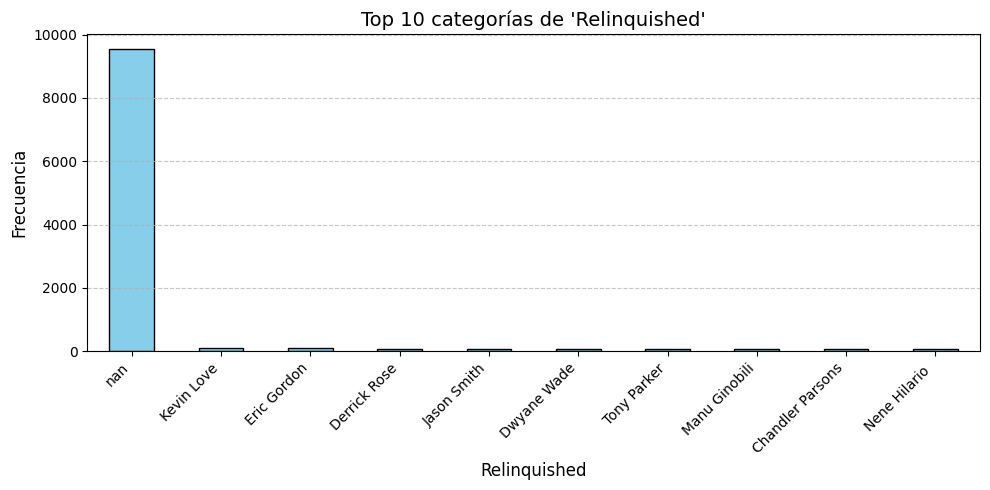

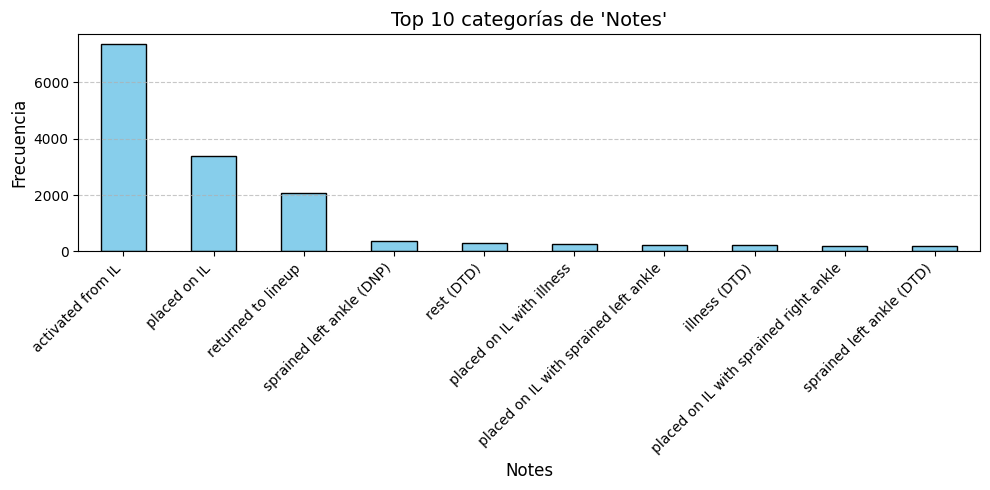

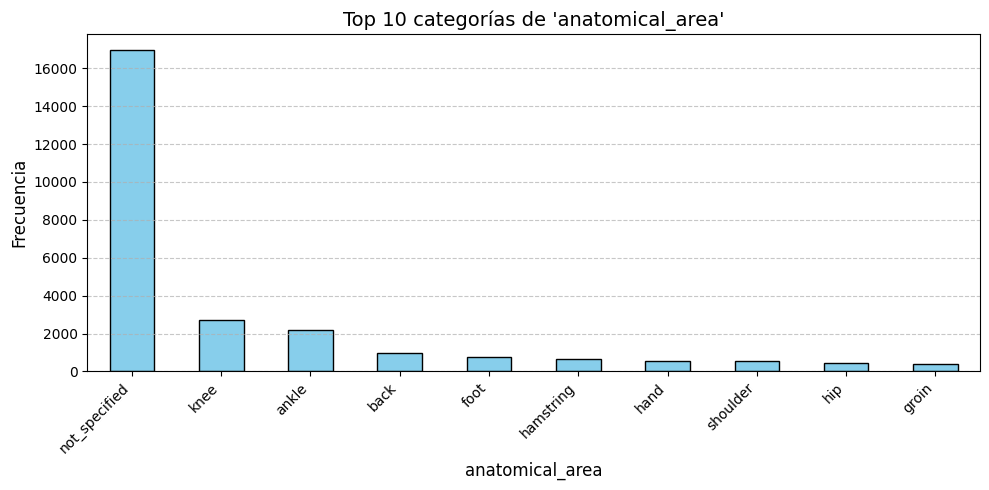

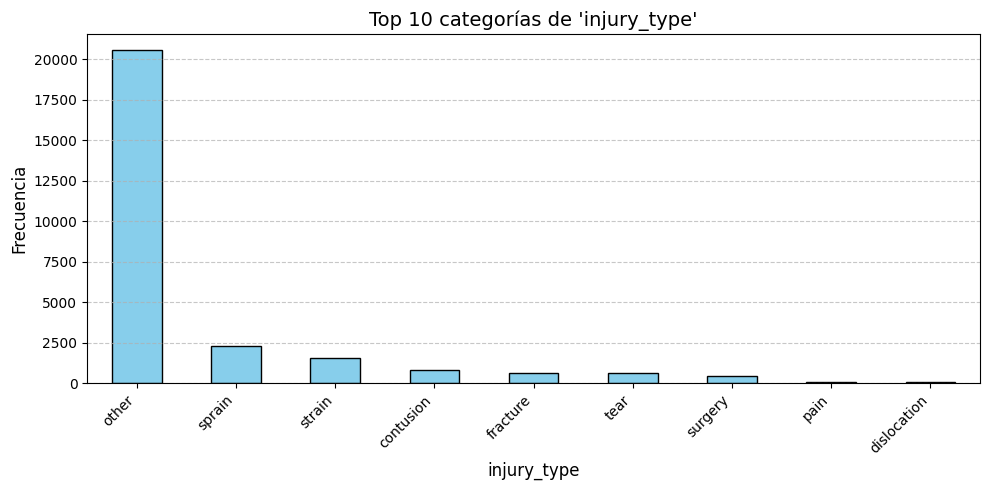

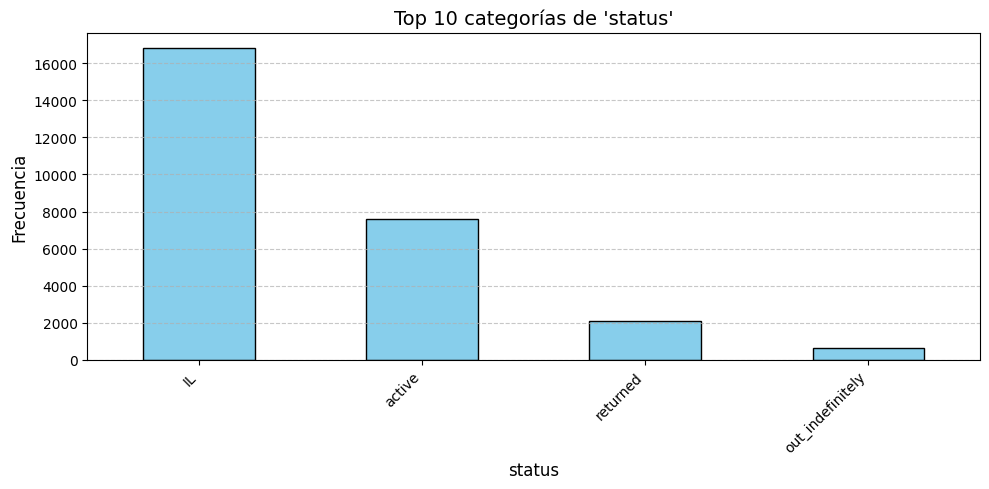

In [8]:
#calculo de frecuencias absolutas

columnas = ['Relinquished', 'Notes', 'anatomical_area', 'injury_type', 'status']


for col in columnas:
    frecuencias = lesiones[col].value_counts(dropna=False).head(10)  # Solo las 10 más frecuentes

    plt.figure(figsize=(10, 5))
    frecuencias.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f"Top 10 categorías de '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

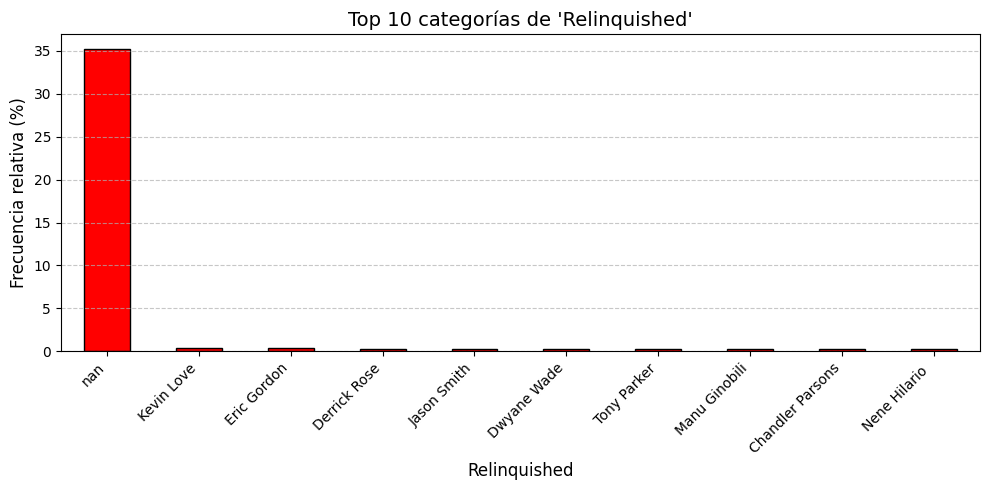

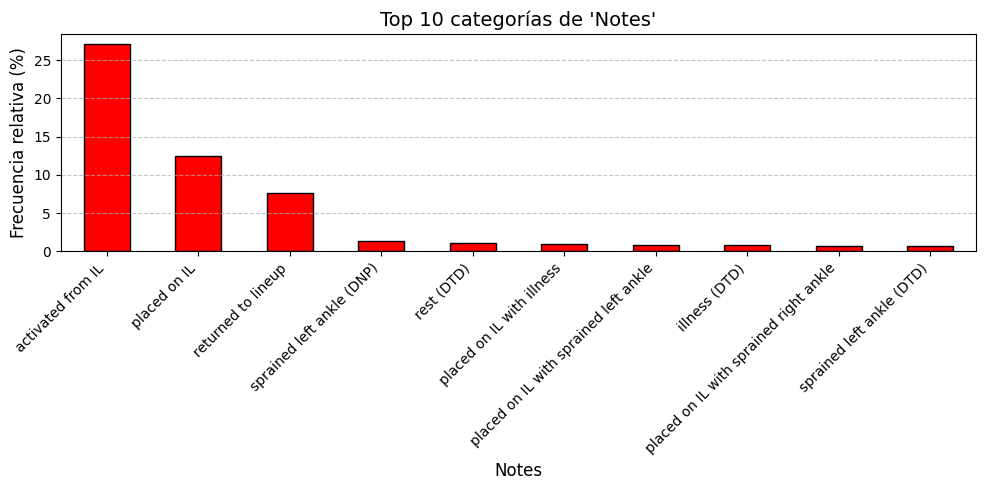

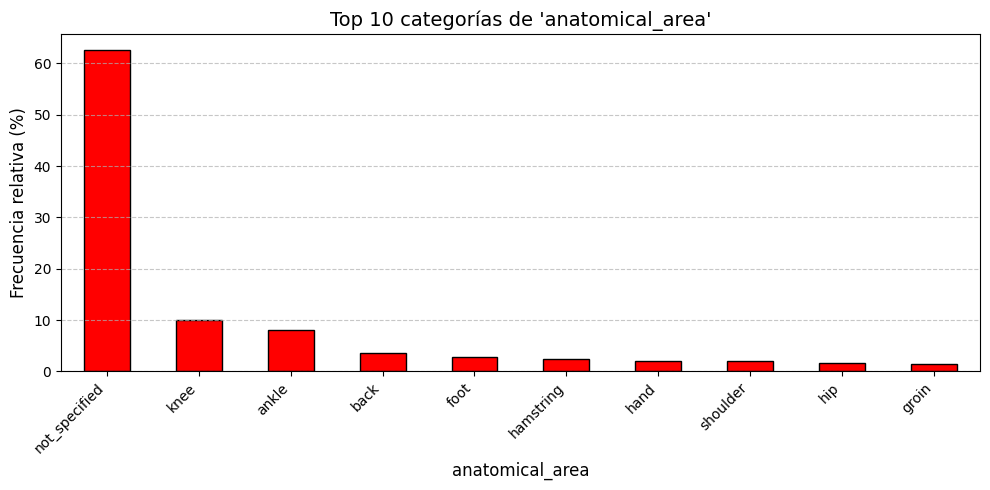

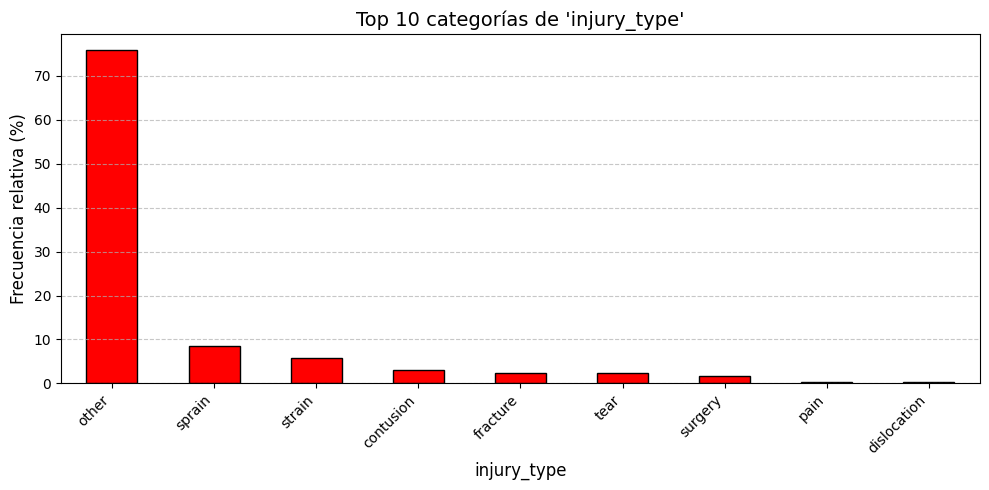

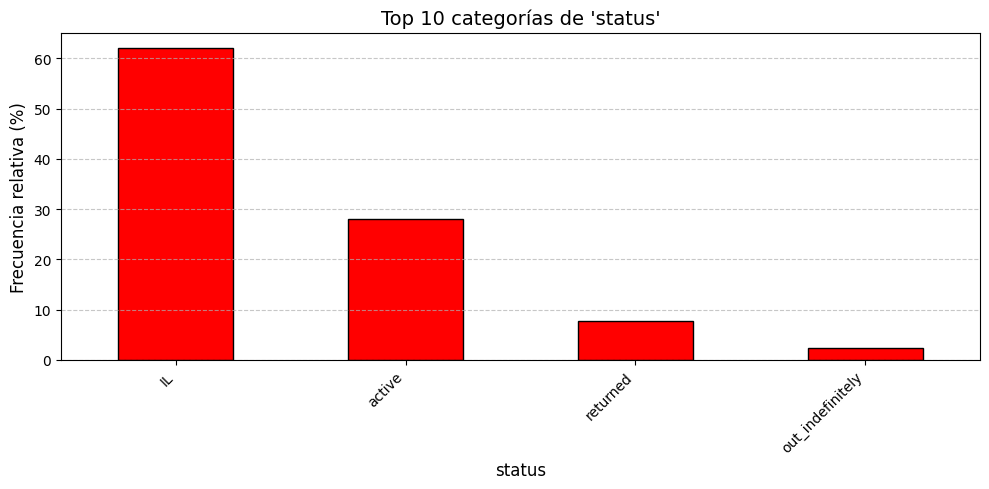

In [11]:
#Frecuencia relativas> 

columns = ['Relinquished', 'Notes', 'anatomical_area', 'injury_type', 'status']

for col in columns:
    frecuencia_rel = lesiones[col].value_counts(normalize=True, dropna=False).head(10) * 100

    plt.figure(figsize=(10, 5))
    frecuencia_rel.plot(kind='bar', color='red', edgecolor='black')

    plt.title(f"Top 10 categorías de '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecuencia relativa (%)", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
